# 交叉验证
西瓜书上是这么解释：交叉验证法先将数据集D划分为k个大小相似的互斥子集，每个子集Di都尽可能保持数据分布的一致性，即从D中通过分层采样得到。然后每次用k-1个子集的并集做为训练集，余下的子集做为测试集，这样就可以获得K组训练/测试集，从而可以进行k次训练和测试，最终返回的是这个k个测试结果的均值。k通常的取值是10，其他常用取值为2，5，20等。
* 交叉验证可以“充分利用”有限的数据找到合适的模型参数，防止过度拟合。一般用于数据集较小时
* 原先是将数据分成K分，选取K-1分进行训练，会出现K中情况
* 而交叉验证则是将那N种情况都训练一次，所以训练时间预计要比之前长K倍
* K的取值范围为2~样本数(一份一个样本)

![jupyter](./交叉验证原理图.jpg)

In [14]:
from sklearn.datasets import load_iris   #导入自带数据集(只导入鸢尾花)
from sklearn.model_selection import train_test_split #用来随机划分样本数据
from sklearn.neighbors import KNeighborsClassifier  #导入需要的算法

In [15]:
iris = load_iris() #鸢尾花数据
X=iris.data
Y=iris.target

## 正常情况
只训练了一种情况

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=4)

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)  #将算法定义成一个对象（临近点个数为5）
clf = knn.fit(X_train,Y_train)
knn.predict(X_test)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2])

In [18]:
clf.score(X_test,Y_test)

0.9777777777777777

这个分数比较片面

## 交叉验证(k折交叉验证)
将K中情况都进行验证，取平均值

In [19]:
from sklearn.model_selection import cross_val_score  #sklearn.cross_validation已弃用

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=4)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)  #将算法定义成一个对象（临近点个数为5）
clf = knn.fit(X_train,Y_train)
clf.predict(X_test)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2])

In [22]:
cross_val_score(clf,X,Y   #交叉验证评分
                ,cv=5     #分成五组(K=5)
                ,scoring="accuracy"     #判断准确度
               ).mean()   #取平均值

0.9733333333333334

这个分数更准确

### 1--如何选择参数
研究临近点范围从1-30取值范围中分数的变化

In [23]:
import matplotlib.pyplot as plt

In [33]:
n_scores = []   #存放分数
for n in range(1,31):   #将1-30分别传入并训练，得到分数
    knn = KNeighborsClassifier(n_neighbors=n)  #临近点个数1-30
    scores = cross_val_score(knn,X,Y,cv=10,scoring="accuracy")  #这里分成10份
    #loss = -cross_val_score(knn,X,Y,cv=10,scoring="mean_squared_error")
    n_scores.append(scores.mean())

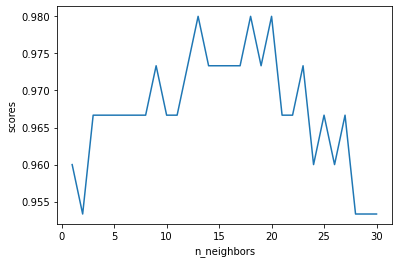

In [34]:
plt.plot(range(1,31),n_scores)
plt.xlabel("n_neighbors")
plt.ylabel("scores")
plt.show()

* 这个例子的n是指n_neighbors ，交叉验证能更加准确客观的体现模型的准确度
* 图中分析得出，当n=14时(可能每次运行会有差异)训练准确度已经达到最高值。单n值（临近点个数过小），会导致过耦合，过大会导致欠耦合，这都会影响模型的准确度